# Explore here

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.to_csv('/workspaces/Finarosalina_K_Medias_ML_no_supe/data/raw/raw_data.csv')

In [4]:
# solo nos interesan las columnas Latitude, Longitude y MedInc.
data.drop(columns=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], inplace=True)

In [5]:
data.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


Viendo los valores de MedInc, está claro que tiene outliers por la parte alta, conviene observarlos y si no son demasiados eliminarlos.

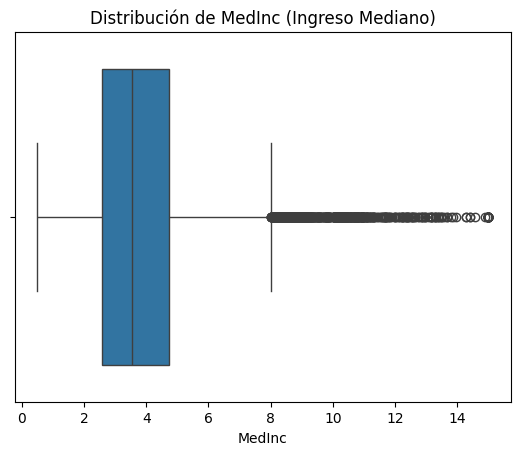

In [6]:
sns.boxplot(x=data['MedInc'])
plt.title("Distribución de MedInc (Ingreso Mediano)")
plt.show()


In [7]:
# Filtrar por debajo del percentil 95
data_filtered = data[data['MedInc'] < data['MedInc'].quantile(0.95)]
data_filtered.shape


(19608, 3)

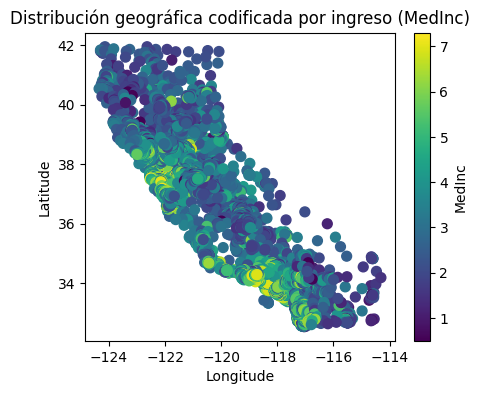

In [8]:
plt.figure(figsize=(5, 4))

#  Longitud vs Latitud, codificando MedInc con color
scatter = plt.scatter(data_filtered['Longitude'], data_filtered['Latitude'],
                      c=data_filtered['MedInc'], cmap='viridis', s=50)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución geográfica codificada por ingreso (MedInc)")
plt.colorbar(scatter, label='MedInc')  # Muestra la escala de colores

plt.show()


In [9]:
X = data_filtered[['Latitude', 'Longitude', 'MedInc']]


In [10]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


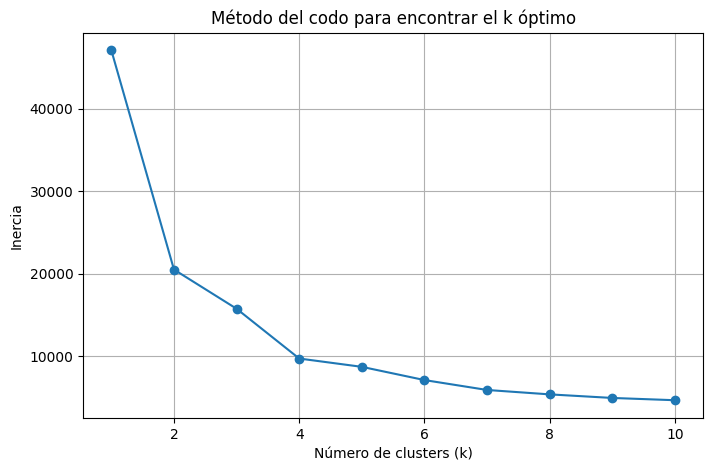

In [11]:
inercias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inercias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el k óptimo')
plt.grid(True)
plt.show()


In [35]:
# viendo la gráfica dudaba entre k=2 y K=4, pero se consigue mejor Silhouette Score

kmeans = KMeans(n_clusters=2, random_state=42)
train_labels = kmeans.fit_predict(X_train_scaled)


In [36]:
test_labels = kmeans.predict(X_test_scaled)

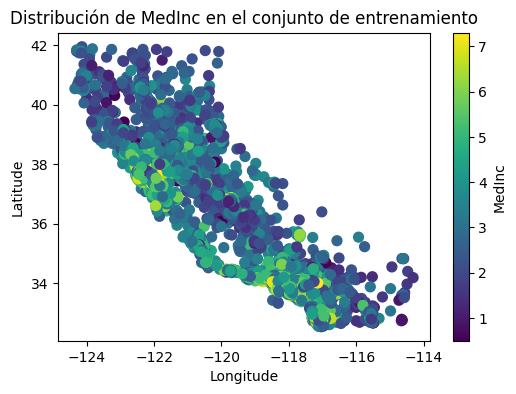

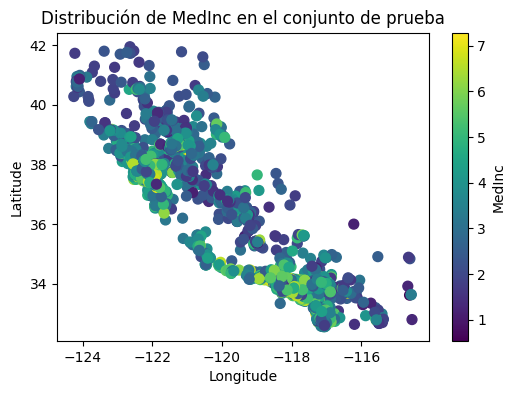

In [37]:

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['MedInc'], cmap='viridis', s=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución de MedInc en el conjunto de entrenamiento")
plt.colorbar(scatter, label='MedInc')
plt.show()

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['MedInc'], cmap='viridis', s=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución de MedInc en el conjunto de prueba")
plt.colorbar(scatter, label='MedInc')
plt.show()


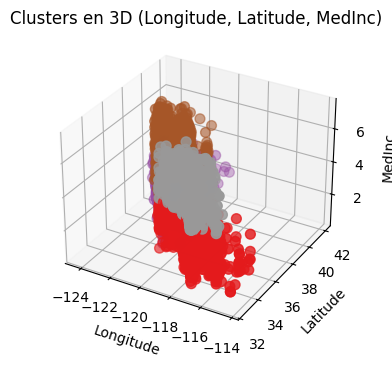

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Graficar los clusters en 3D con Longitude, Latitude y MedInc
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# Asignamos las tres variables: Longitude, Latitude, MedInc
ax.scatter(X_train['Longitude'], X_train['Latitude'], X_train['MedInc'], c=X_train['Cluster'], cmap='Set1', s=50)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("MedInc")
ax.set_title("Clusters en 3D (Longitude, Latitude, MedInc)")
plt.show()


In [39]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train_scaled, train_labels)
print(f"Silhouette Score para el conjunto de entrenamiento: {silhouette_avg}")


Silhouette Score para el conjunto de entrenamiento: 0.522773948640415


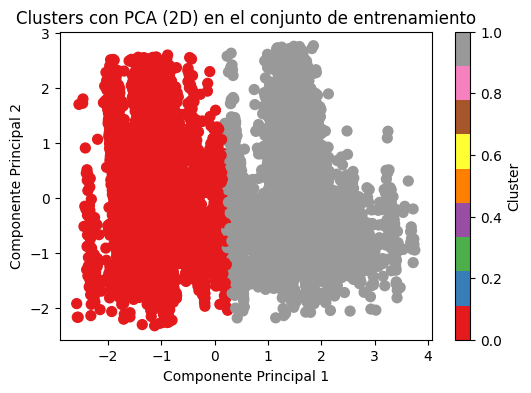

Varianza explicada por cada componente: [0.64237593 0.33377623]
Varianza total explicada: 0.9761521628398622


In [ ]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
train_labels = kmeans.labels_

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='Set1', s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters con PCA (2D) en el conjunto de entrenamiento")
plt.colorbar(scatter, label='Cluster')
plt.show()

print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")



Visualmetne se aprecia la mejora, además que con una componente menos se explican el 97% de los datos, lo que es logico, pq hay una cierta relación.

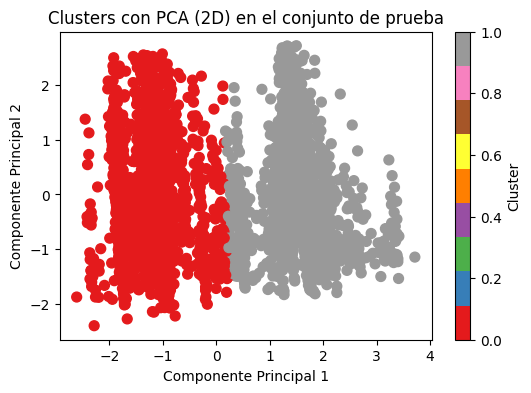

Silhouette Score para el conjunto de prueba: 0.5421498507375512


In [ ]:
X_test_pca = pca.transform(X_test_scaled)  

test_labels = kmeans.predict(X_test_pca)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='Set1', s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters con PCA (2D) en el conjunto de prueba")
plt.colorbar(scatter, label='Cluster')
plt.show()

silhouette_test = silhouette_score(X_test_pca, test_labels)
print(f"Silhouette Score para el conjunto de prueba: {silhouette_test}")
